# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). 
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. 

---


#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


In [2]:
# Dependencies and Setup
import csv
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import random
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city=city.replace(' ', '%20')
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
newcities= [x.replace(' ', '%20')for x in cities]


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#create an empty list to store data (columns)
name = []
cloud = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []
record=0

In [6]:
#Perform a weather check on each city using a series of succesive API calls
#start with weathermap API call
query_url = f"{url}appid={api_key}&units={units}&q={city}"

print(f"Begining Data Retrieval")
print(f"------------------------------")

#loop through the city from the cities list

for city in cities:
  try:
    query_url = f"{url}appid={api_key}&units={units}&q={city}"
    response = req.get(query_url).json()
    name.append(response["name"])
    cloud.append(response["clouds"]["all"])
    country.append(response["sys"]["country"])
    date.append(response["dt"])
    humidity.append(response["main"]["humidity"])
    max_temp.append(response["main"]["temp_max"])
    lat.append(response["coord"]["lat"])
    lon.append(response["coord"]["lon"])
    wind_speed.append(response["wind"]["speed"])
    city_record = response["name"]
    print(f"Processing Record {city_record} | {city}")
    print(f"{url}appid={api_key}&units={units}&q={city}")
    time.sleep(random.choice(1))
    #Increase counter by 1
    record = record + 1
  except: 
    #if not record is found skip to next call
    if city not in cities:
            print("City not found. Skipping...")
            continue


Begining Data Retrieval
------------------------------
Processing Record Denpasar | denpasar
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=denpasar
Processing Record Nuevitas | nuevitas
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=nuevitas
Processing Record Caratinga | caratinga
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=caratinga
Processing Record Chokurdakh | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=chokurdakh
Processing Record Snyder | snyder
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=snyder
Processing Record Castro | castro
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=castro
Processing Record Port Alfred | port%20alfred
ht

Processing Record Faya | faya
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=faya
Processing Record Talnakh | talnakh
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=talnakh
Processing Record Hermanus | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=hermanus
Processing Record Ploemeur | ploemeur
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=ploemeur
Processing Record Busselton | busselton
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=busselton
Processing Record Adrar | adrar
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=adrar
Processing Record Luang Prabang | luang%20prabang
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc

Processing Record La Joya | la%20joya
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=la%20joya
Processing Record Trincomalee | trincomalee
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=trincomalee
Processing Record Saint Anthony | saint%20anthony
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=saint%20anthony
Processing Record Gamba | gamba
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=gamba
Processing Record Cukai | cukai
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=cukai
Processing Record Chalmette | chalmette
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=chalmette
Processing Record Kuytun | kuytun
http://api.openweathermap.org/data/2.5/weather?appid

Processing Record Vilyuysk | vilyuysk
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=vilyuysk
Processing Record Krasnogorsk | krasnogorsk
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=krasnogorsk
Processing Record Manokwari | manokwari
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=manokwari
Processing Record Mahebourg | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=mahebourg
Processing Record Puerto Leguizamo | puerto%20leguizamo
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=puerto%20leguizamo
Processing Record Rio Grande City | rio%20grande%20city
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=rio%20grande%20city
Processing Record Mareeba | 

Processing Record Borogontsy | borogontsy
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=borogontsy
Processing Record Aripuana | aripuana
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=aripuana
Processing Record Never | never
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=never
Processing Record Tiksi | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=tiksi
Processing Record Berlevag | berlevag
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=berlevag
Processing Record Okha | okha
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=okha
Processing Record Otradnoye | otradnoye
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c8

Processing Record Aksha | aksha
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=aksha
Processing Record Gdansk | gdansk
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=gdansk
Processing Record Boa Vista | boa%20vista
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=boa%20vista
Processing Record Henderson | henderson
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=henderson
Processing Record Bonnyville | bonnyville
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=bonnyville
Processing Record Candido Mendes | candido%20mendes
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=candido%20mendes
Processing Record Makakilo City | makakilo%20city
http://api.openweathermap.o

Processing Record Chandur | chandur
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=chandur
Processing Record Sept-Iles | sept-iles
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=sept-iles
Processing Record Quelimane | quelimane
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=quelimane
Processing Record Lewiston | lewiston
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=lewiston
Processing Record Dawei | dawei
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=dawei
Processing Record Flinders | flinders
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=flinders
Processing Record Ust-Nera | ust-nera
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabf

Processing Record Russell | russell
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=russell
Processing Record Ginda | ginda
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=ginda
Processing Record Klichka | klichka
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=klichka
Processing Record Tarakan | tarakan
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=tarakan
Processing Record Neiafu | neiafu
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=neiafu
Processing Record Atar | atar
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=atar
Processing Record Yeppoon | yeppoon
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial

Processing Record Kristianstad | kristianstad
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=kristianstad
Processing Record Auki | auki
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=auki
Processing Record Luau | luau
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=luau
Processing Record Nuuk | nuuk
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=nuuk
Processing Record Orleans | orleans
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=orleans
Processing Record Ancud | ancud
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=ancud
Processing Record Aljezur | aljezur
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial

Processing Record Rome | roma
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=roma
Processing Record Fort Nelson | fort%20nelson
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=fort%20nelson
Processing Record Batagay-Alyta | batagay-alyta
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=batagay-alyta
Processing Record Recreio | recreio
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=recreio
Processing Record Oytal | oytal
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=oytal
Processing Record Aranos | aranos
http://api.openweathermap.org/data/2.5/weather?appid=4696e5bb09aaabfcbc42dc4f01ab1c87&units=imperial&q=aranos
Processing Record Saint-Louis | saint-louis
http://api.openweathermap.org/data/2.5/weather?appid=4696e

In [7]:
city_weather = pd.DataFrame(list(zip(name, cloud, country, date, humidity, lat, lon, max_temp, wind_speed)), 
               columns =['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])

In [8]:
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Denpasar,40,ID,1556911800,88,-8.65,115.22,78.80,3.36
1,Nuevitas,75,CU,1556913000,61,21.55,-77.27,82.40,17.22
2,Caratinga,40,BR,1556913600,83,-19.79,-42.14,82.40,3.36
3,Chokurdakh,100,RU,1556916345,91,70.62,147.90,25.43,6.91
4,Snyder,90,US,1556915705,73,32.72,-100.92,75.00,4.70


In [9]:
city_weather.dropna()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Denpasar,40,ID,1556911800,88,-8.65,115.22,78.80,3.36
1,Nuevitas,75,CU,1556913000,61,21.55,-77.27,82.40,17.22
2,Caratinga,40,BR,1556913600,83,-19.79,-42.14,82.40,3.36
3,Chokurdakh,100,RU,1556916345,91,70.62,147.90,25.43,6.91
4,Snyder,90,US,1556915705,73,32.72,-100.92,75.00,4.70
5,Castro,90,CL,1556913600,100,-42.48,-73.76,51.80,3.36
6,Port Alfred,7,ZA,1556916135,86,-33.59,26.89,60.01,3.00
7,Archidona,75,EC,1556913600,100,-0.91,-77.81,80.60,3.36
8,Ushuaia,40,AR,1556913600,56,-54.81,-68.31,41.00,5.82
9,Isangel,75,VU,1556913600,83,-19.55,169.27,71.60,20.47


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
city_weather.to_csv("Weatherpy_Output1.csv")

In [ ]:
city_weather

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

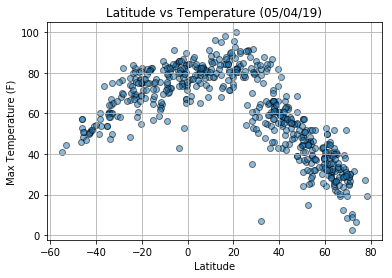

In [11]:
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o",alpha=.5,edgecolor='black')

# Incorporate the other graph properties
plt.title("Latitude vs Temperature (05/04/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvstempCities.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

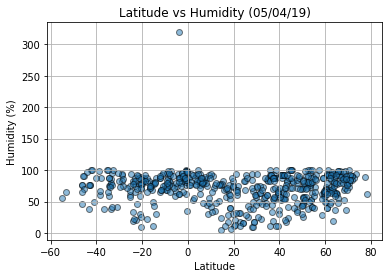

In [14]:
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o",alpha=.5,edgecolor='black')

# Incorporate the other graph properties
plt.title("Latitude vs Humidity (05/04/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvshumidityCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

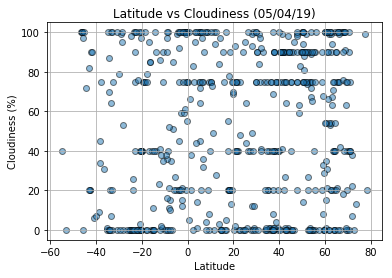

In [15]:
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o",alpha=.5,edgecolor='black')

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness (05/04/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvscloudinessCities.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

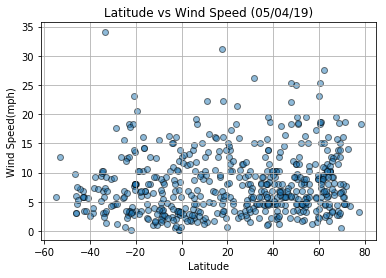

In [18]:
plt.scatter(city_weather["Lat"], city_weather["Wind Speed"], marker="o",alpha=.5,edgecolor='black')

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed (05/04/19)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvswindspeedCities.png")

# Show plot
plt.show()